## Wrangle and Analyze Data
This project contains three big aspects: Gather, Assess, and Clean data which are followed by storing, analyzing, and visualizing the reults.

## Table of Contents

- [Gather and import data](#a)
- [Assessing each of the three dataframes](#b)
    - [archived dataframe: df](#1)
    - [image dataframe: image_df](#2)
    - [extracted from Twitter API: new_df](#3)
- [Cleaning data into one main dataframe](#c)
- [Visualizing Data](#d)


<a id='a'></a>
## Gather and import Data

In [59]:
#impoart all packages
import tweepy
import json
from tweepy import OAuthHandler
import requests
import pandas as pd
from timeit import default_timer as timer

In [721]:
#load data from twitter.archived.enhanced.csv and create an archived dataframe called df
df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_id = df['tweet_id']

In [71]:
#input image information and create an image dataframe called image_df
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [60]:
#input api

consumer_key = 'aaaaaaaa'
consumer_secret = 'bbbbbbb'
access_token = 'cccccccc'
access_secret = 'ddddddd'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth ,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [62]:
#Create tweet_json.txt file
fails_dict = {}
start = timer()
count = 0
with open ('tweet_json.txt','w') as outfile:
    for i in tweet_id:
        count+=1
        print(str(count) +':' +str(i))
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            print('success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print('fail')
            fails_dict[i] = e
            pass
        
        
end = timer()
print(end - start)
print(fails_dict)

1:892420643555336193
success
2:892177421306343426
success
3:891815181378084864
success
4:891689557279858688
success
5:891327558926688256
success
6:891087950875897856
success
7:890971913173991426
success
8:890729181411237888
success
9:890609185150312448
success
10:890240255349198849
success
11:890006608113172480
success
12:889880896479866881
success
13:889665388333682689
success
14:889638837579907072
success
15:889531135344209921
success
16:889278841981685760
success
17:888917238123831296
success
18:888804989199671297
success
19:888554962724278272
success
20:888202515573088257
fail
21:888078434458587136
success
22:887705289381826560
success
23:887517139158093824
success
24:887473957103951883
success
25:887343217045368832
success
26:887101392804085760
success
27:886983233522544640
success
28:886736880519319552
success
29:886680336477933568
success
30:886366144734445568
success
31:886267009285017600
success
32:886258384151887873
success
33:886054160059072513
success
34:885984800019947520


success
272:841077006473256960
success
273:840761248237133825
success
274:840728873075638272
success
275:840698636975636481
success
276:840696689258311684
success
277:840632337062862849
success
278:840370681858686976
success
279:840268004936019968
success
280:839990271299457024
success
281:839549326359670784
success
282:839290600511926273
success
283:839239871831150596
success
284:838952994649550848
success
285:838921590096166913
success
286:838916489579200512
success
287:838831947270979586
success
288:838561493054533637
success
289:838476387338051585
success
290:838201503651401729
success
291:838150277551247360
success
292:838085839343206401
success
293:838083903487373313
success
294:837820167694528512
success
295:837482249356513284
success
296:837471256429613056
success
297:837366284874571778
fail
298:837110210464448512
success
299:837012587749474308
fail
300:836989968035819520
success
301:836753516572119041
success
302:836677758902222849
success
303:836648853927522308
success
304:83

success
538:806629075125202948
success
539:806620845233815552
success
540:806576416489959424
success
541:806542213899489280
success
542:806242860592926720
success
543:806219024703037440
success
544:805958939288408065
success
545:805932879469572096
success
546:805826884734976000
success
547:805823200554876929
success
548:805520635690676224
success
549:805487436403003392
success
550:805207613751304193
success
551:804738756058218496
success
552:804475857670639616
success
553:804413760345620481
success
554:804026241225523202
success
555:803773340896923648
success
556:803692223237865472
success
557:803638050916102144
success
558:803380650405482500
success
559:803321560782307329
success
560:803276597545603072
success
561:802952499103731712
success
562:802624713319034886
success
563:802600418706604034
success
564:802572683846291456
success
565:802323869084381190
success
566:802265048156610565
success
567:802247111496568832
fail
568:802239329049477120
success
569:802185808107208704
success
570

success
803:772193107915964416
success
804:772152991789019136
success
805:772117678702071809
success
806:772114945936949249
success
807:772102971039580160
success
808:771908950375665664
success
809:771770456517009408
success
810:771500966810099713
success
811:771380798096281600
success
812:771171053431250945
success
813:771136648247640064
success
814:771102124360998913
success
815:771014301343748096
success
816:771004394259247104
fail
817:770787852854652928
success
818:770772759874076672
success
819:770743923962707968
fail
820:770655142660169732
success
821:770414278348247044
success
822:770293558247038976
success
823:770093767776997377
success
824:770069151037685760
success
825:769940425801170949
success
826:769695466921623552
success
827:769335591808995329
success
828:769212283578875904
success
829:768970937022709760
success
830:768909767477751808
success
831:768855141948723200
success
832:768609597686943744
success
833:768596291618299904
success
834:768554158521745409
success
835:76

Rate limit reached. Sleeping for: 14


success
899:758854675097526272
success
900:758828659922702336
success
901:758740312047005698
success
902:758474966123810816
success
903:758467244762497024
success
904:758405701903519748
success
905:758355060040593408
success
906:758099635764359168
success
907:758041019896193024
success
908:757741869644341248
success
909:757729163776290825
success
910:757725642876129280
success
911:757611664640446465
success
912:757597904299253760
success
913:757596066325864448
success
914:757400162377592832
success
915:757393109802180609
success
916:757354760399941633
success
917:756998049151549440
success
918:756939218950160384
success
919:756651752796094464
success
920:756526248105566208
success
921:756303284449767430
success
922:756288534030475264
success
923:756275833623502848
success
924:755955933503782912
success
925:755206590534418437
success
926:755110668769038337
success
927:754874841593970688
success
928:754856583969079297
success
929:754747087846248448
success
930:754482103782404096
success


success
1160:724046343203856385
success
1161:724004602748780546
success
1162:723912936180330496
success
1163:723688335806480385
success
1164:723673163800948736
success
1165:723179728551723008
success
1166:722974582966214656
success
1167:722613351520608256
success
1168:721503162398597120
success
1169:721001180231503872
success
1170:720785406564900865
success
1171:720775346191278080
success
1172:720415127506415616
success
1173:720389942216527872
success
1174:720340705894408192
success
1175:720059472081784833
success
1176:720043174954147842
success
1177:719991154352222208
success
1178:719704490224398336
success
1179:719551379208073216
success
1180:719367763014393856
success
1181:719339463458033665
success
1182:719332531645071360
success
1183:718971898235854848
success
1184:718939241951195136
success
1185:718631497683582976
success
1186:718613305783398402
success
1187:718540630683709445
success
1188:718460005985447936
success
1189:718454725339934721
success
1190:718246886998687744
success


success
1417:698635131305795584
success
1418:698549713696649216
success
1419:698355670425473025
success
1420:698342080612007937
success
1421:698262614669991936
success
1422:698195409219559425
success
1423:698178924120031232
success
1424:697995514407682048
success
1425:697990423684476929
success
1426:697943111201378304
success
1427:697881462549430272
success
1428:697630435728322560
success
1429:697616773278015490
success
1430:697596423848730625
success
1431:697575480820686848
success
1432:697516214579523584
success
1433:697482927769255936
success
1434:697463031882764288
success
1435:697270446429966336
success
1436:697259378236399616
success
1437:697255105972801536
success
1438:697242256848379904
success
1439:696900204696625153
success
1440:696894894812565505
success
1441:696886256886657024
success
1442:696877980375769088
success
1443:696754882863349760
success
1444:696744641916489729
success
1445:696713835009417216
success
1446:696518437233913856
success
1447:696490539101908992
success


success
1674:682303737705140231
success
1675:682259524040966145
success
1676:682242692827447297
success
1677:682088079302213632
success
1678:682059653698686977
success
1679:682047327939461121
success
1680:682032003584274432
success
1681:682003177596559360
success
1682:681981167097122816
success
1683:681891461017812993
success
1684:681694085539872773
success
1685:681679526984871937
success
1686:681654059175129088
success
1687:681610798867845120
success
1688:681579835668455424
success
1689:681523177663676416
success
1690:681340665377193984
success
1691:681339448655802368
success
1692:681320187870711809
success
1693:681302363064414209
success
1694:681297372102656000
success
1695:681281657291280384
success
1696:681261549936340994
success
1697:681242418453299201
success
1698:681231109724700672
success
1699:681193455364796417
success
1700:680970795137544192
success
1701:680959110691590145
success
1702:680940246314430465
success
1703:680934982542561280
success
1704:680913438424612864
success


Rate limit reached. Sleeping for: 665


success
1800:677187300187611136
success
1801:676975532580409345
success
1802:676957860086095872
success
1803:676949632774234114
success
1804:676948236477857792
success
1805:676946864479084545
success
1806:676942428000112642
success
1807:676936541936185344
success
1808:676916996760600576
success
1809:676897532954456065
success
1810:676864501615042560
success
1811:676821958043033607
success
1812:676819651066732545
success
1813:676811746707918848
success
1814:676776431406465024
success
1815:676617503762681856
success
1816:676613908052996102
success
1817:676606785097199616
success
1818:676603393314578432
success
1819:676593408224403456
success
1820:676590572941893632
success
1821:676588346097852417
success
1822:676582956622721024
success
1823:676575501977128964
success
1824:676533798876651520
success
1825:676496375194980353
success
1826:676470639084101634
success
1827:676440007570247681
success
1828:676430933382295552
success
1829:676263575653122048
success
1830:676237365392908289
success


success
2057:671357843010908160
success
2058:671355857343524864
success
2059:671347597085433856
success
2060:671186162933985280
success
2061:671182547775299584
success
2062:671166507850801152
success
2063:671163268581498880
success
2064:671159727754231808
success
2065:671154572044468225
success
2066:671151324042559489
success
2067:671147085991960577
success
2068:671141549288370177
success
2069:671138694582165504
success
2070:671134062904504320
success
2071:671122204919246848
success
2072:671115716440031232
success
2073:671109016219725825
success
2074:670995969505435648
success
2075:670842764863651840
success
2076:670840546554966016
success
2077:670838202509447168
success
2078:670833812859932673
success
2079:670832455012716544
success
2080:670826280409919488
success
2081:670823764196741120
success
2082:670822709593571328
success
2083:670815497391357952
success
2084:670811965569282048
success
2085:670807719151067136
success
2086:670804601705242624
success
2087:670803562457407488
success


success
2314:666739327293083650
success
2315:666701168228331520
success
2316:666691418707132416
success
2317:666649482315059201
success
2318:666644823164719104
success
2319:666454714377183233
success
2320:666447344410484738
success
2321:666437273139982337
success
2322:666435652385423360
success
2323:666430724426358785
success
2324:666428276349472768
success
2325:666421158376562688
success
2326:666418789513326592
success
2327:666411507551481857
success
2328:666407126856765440
success
2329:666396247373291520
success
2330:666373753744588802
success
2331:666362758909284353
success
2332:666353288456101888
success
2333:666345417576210432
success
2334:666337882303524864
success
2335:666293911632134144
success
2336:666287406224695296
success
2337:666273097616637952
success
2338:666268910803644416
success
2339:666104133288665088
success
2340:666102155909144576
success
2341:666099513787052032
success
2342:666094000022159362
success
2343:666082916733198337
success
2344:666073100786774016
success


In [63]:
#create a new dataframe with data in tweet_json.txt called df_new
file =  open ('tweet_json.txt','r') 
tweet_data = []    
for line in file:
    tweet = json.loads(line)
    tweet_data.append(tweet)
df_new = pd.DataFrame(tweet_data, columns = {'id','retweet_count','favorite_count'})      
df_new.head()

,id,retweet_count,favorite_count
0,892420643555336193,7720,36250
1,892177421306343426,5707,31264
2,891815181378084864,3782,23543
3,891689557279858688,7877,39548
4,891327558926688256,8493,37766


<a id='b'></a>
## Assess data

<a id='1'></a>
### Dataframe with archived data: df

##### Quality Issue
1. missing values in these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.
2. contains rows that are retweets and replies
3. timestamp and retweeted_status_timestamp are string
4. the columns 'doggo, floofer, pupper, and puppo' have many 'None' values
5. the column 'name' contains invalid names, such as 'a', 'None'.
6. the rating denominator should not be 0.
7. the rating donominator is not standardized

##### Tidiness Issue
1. the columns 'floofer, pupper, and puppo' should be consolidated to be consise

In [736]:
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
782,775364825476165632,NaN,NaN,2016-09-12 16:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,None,None,None
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
1900,674664755118911488,NaN,NaN,2015-12-09 18:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rodman. He's getting destroyed by the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674664755...,10,10,Rodman,None,None,None,None


In [733]:
#check the information of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [737]:
#check if there are retweets
df.retweeted_status_id.nunique()

181

In [740]:
#check if there are replies
df.in_reply_to_status_id.nunique()

77

In [123]:
#get a sense of what numbers are in the numerators
df['rating_numerator'].value_counts(sort = True)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [125]:
#get a sense of what numbers are in the denominators
df['rating_denominator'].value_counts(sort = True)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [126]:
#find out the row that has a denominator of 0
df[df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [742]:
#check if these columns contain too many null values so they can be consolidated
print(df.pupper.value_counts(), df.doggo.value_counts(), df.floofer.value_counts(),df.puppo.value_counts())

None      2099
pupper     257
Name: pupper, dtype: int64 None     2259
doggo      97
Name: doggo, dtype: int64 None       2346
floofer      10
Name: floofer, dtype: int64 None     2326
puppo      30
Name: puppo, dtype: int64


In [93]:
#check the capitalization situation of the names
df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

<a id='2'></a>
### Image dataframe: image_df

##### Quality Issue
8. dog breeds in p1, p2, and p3 columns are not consistently in upper/lower letters

##### Tidiness Issue
2. this dataframe contains information that is associated with df, which mean this dataframe should be combined.
3. the columns p1, p2, p3 are too redundant

In [743]:
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [94]:
#check the information of each column
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [96]:
#check duplicates
image_df.duplicated().sum()

0

<a id='3'></a>
### Dataframe with retweets, favoraite tweets information: df_new

##### Quality Issue
- no issue

##### Tidiness Issue
3. this dataframe has information that associate with the information (retweets) in df, which means this dataframe should be combined.

In [104]:
df_new.sample(5)

,id,retweet_count,favorite_count
2021,671520732782923777,507,1348
1851,675111688094527488,245,940
2215,667924896115245057,108,285
894,756939218950160384,2024,6694
2180,668633411083464705,1550,2698


In [98]:
#
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [100]:
#check duplicates
df_new.duplicated().sum()

0

In [101]:
#check duplicates
df_new.id.duplicated().sum()

0

In [744]:
df_new.describe()

,retweet_count,favorite_count
count,2331.000000,2331.000000
mean,2708.271128,7572.017589
std,4579.886071,11752.289784
min,1.000000,0.000000
25%,548.000000,1321.000000
50%,1269.000000,3293.000000
75%,3146.500000,9268.500000
max,77949.000000,156432.000000


<a id='c'></a>
### Clean data 


##### Define steps
1. drop retweets and replies rows
2. remove data columns that are missing too many values
3. convert timestamp to date time
4. convert 'doggo, floofer, pupper, and puppo' to categorical values and create a new column to contain all categories
5. change invalid name to NaN
6. drop the line that has a rating_denominator of 0 since its numerator is too large
7. standerdize the ratings
8. leave the most accurate breed in image_df and cut the rest columns
9. standerdize the breeds spelling by lowering cases
10. merge image_df and new_df dataframes to the main dataframe df

In [803]:
#make copies of existing dataframes
df_clean = df.copy()
image_df_clean = image_df.copy()
df_new_clean = df_new.copy()


### Define
1. drop retweets and replies rows

### Code

In [804]:
#drop retweets and replies rows
df_clean = df_clean[df_clean['retweeted_status_id'].isna()]
df_clean = df_clean[df_clean['in_reply_to_status_id'].isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Test

In [ ]:
df_clean.info()

### Define
2. remove data columns that are missing too many values

### Code

In [805]:
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',\
                        'retweeted_status_timestamp' ], axis = 1)
df_clean.expanded_urls.fillna('na',inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Test

In [ ]:
df_clean.info()

### Define
3. convert timestamp to date time

### Code

In [806]:
df_clean.timestamp = df_clean.timestamp.str.strip('+00:00')
df_clean.timestamp = pd.to_datetime(df_clean['timestamp'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Test

In [1]:
df_clean.info()

NameError: name 'df_clean' is not defined

### Define
4. convert 'doggo, floofer, pupper, and puppo' to categorical values and create a new column to contain all categories

### Code

In [807]:
#convert 'doggo, floofer, pupper, and puppo' to categorical values and create a new column to contain all categories

#replace all 'None' values with nothing
df_clean.doggo = df_clean['doggo'].replace('None','')
df_clean.floofer = df_clean['floofer'].replace('None','')
df_clean.pupper = df_clean['pupper'].replace('None','')
df_clean.puppo = df_clean['puppo'].replace('None','')

#create a new column that combines all categories
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
df_clean.stage = df_clean.stage.astype('category')
#drop unnecessary columns
df_clean = df_clean.drop(['doggo','pupper','puppo','floofer'], axis = 1)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
201,853760880890318849,2017-04-17 00:03:50,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,
1981,672970152493887488,2015-12-05 02:46:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,pupper
2163,669375718304980992,2015-11-25 04:43:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,


### Test 

In [ ]:
df_clean.sample(3)

### Define
5. change invalid name to NaN

### Code

In [808]:
#find the invalid names 
#the conclusion:  found that words start with lower cases are not valid names
list_of_small_letter = ('a','b','c','d','e','f','g','h','i','j','k','l','m','n','o',\
                        'p','q','r','s','t','u','v','w','x','y','z')
res = [idx for idx in df_clean.name if idx.startswith(list_of_small_letter)] 
res

['such',
 'a',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [809]:
#find the index of these invalid names
list_of_small_letter = ('a','b','c','d','e','f','g','h','i','j','k','l','m','n','o',\
                        'p','q','r','s','t','u','v','w','x','y','z')
idx = [idx for idx in df_clean.index if df_clean.loc[idx,'name'].startswith(list_of_small_letter)] 
#change these names to NaN
for i in idx:
    df_clean.loc[i,'name'] = 'NaN'

#replace 'None' to NaN
df_clean.name = df_clean.name.replace('None','NaN')


NaN        707
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Rontu        1
Mosby        1
Dug          1
Gidget       1
General      1
Name: name, Length: 930, dtype: int64

### Test

In [ ]:
df_clean.name.value_counts()

### Define
6. drop the line that has a rating_denominator of 0 since its numerator is too large

### Code

In [810]:
# check if the row that has a denominator of 0 still exists
#if exists, drop the line that has a rating_demonitor of 0 based on its large rating 

df_clean.query('rating_denominator==0').index

df_clean.query('index == 313')

#conclusion:
#this row do longer exists because it was a retweet, so there is no need to drop it

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


### Define
7. standerdize the ratings

### Code

In [811]:
#standerdize the ratings
df_clean['multipler'] = df_clean['rating_denominator']/10
df_clean['rating_numerator_new'] = df_clean['rating_numerator']/df_clean['multipler']
df_clean = df_clean.drop(columns = {'rating_numerator','multipler'},axis = 1)

12.000000      490
10.000000      438
11.000000      418
13.000000      287
9.000000       153
8.000000        98
7.000000        51
14.000000       38
5.000000        35
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
1776.000000      1
34.285714        1
27.000000        1
420.000000       1
0.000000         1
26.000000        1
6.363636         1
8.181818         1
75.000000        1
Name: rating_numerator_new, dtype: int64

### Test

In [ ]:
df_clean['rating_numerator_new'].value_counts()

### Define
8. leave the most accurate breed in image_df and cut the rest columns

### Code

In [813]:
#leave the most accurate breed in image_df and cut the rest columns
def breed(df):
    if df['p1_conf']>df['p2_conf']:
        if df['p1_dog']==True:
            return df['p1']
        if df['p1_dog']==False and df['p2_conf']>df['p3_conf']:
            if df['p2_dog']==True:
                return df['p2']
            else:
                return df['p3']
    if df['p1_conf']<df['p2_conf'] and df['p2_conf']>df['p3_conf']:
        if df['p2_dog']==True:
            return df['p2']
        if df['p2_dog']==False:
            return df['p3']
    else:
        return df['p3']
    
image_df_clean['breed'] = image_df_clean.apply(breed, axis = 1)
image_df_clean = image_df_clean.drop(columns={'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'},axis = 1)


,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Test

In [ ]:
image_df_clean.head()

### Define
9. standerdize the breeds spelling by lowering cases

### Code

In [814]:
#standerdize the breeds spelling by lowering cases
image_df_clean.breed = image_df_clean.breed.str.lower()


0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071        labrador_retriever
2072                 chihuahua
2073                 chihuahua
2074                    banana
Name: breed, Length: 2075, dtype: object

### Test

In [ ]:
image_df_clean.breed

### Define
10. merge image_df and new_df dataframes to the main dataframe df

### Code

In [815]:
#change the data type of tweet_id in df_clean so it can be merged with other dataframes
df_clean.tweet_id = df_clean.tweet_id.astype(str)

#merge image_df and new_df dataframes to the main dataframe df
df_clean = df_clean.merge(image_df_clean, on = 'tweet_id', how = 'inner')
df_clean = df_clean.merge(df_new_clean, left_on = 'tweet_id',right_on = 'id', how = 'left')
df_clean = df_clean.drop('id', axis = 1)


,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,stage,rating_numerator_new,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,7720.0,36250.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,5707.0,31264.0


### Test

In [ ]:
df_clean.head(2)

### Store

In [817]:
#store the dataframe into a csv file
df_clean.to_csv('twitter_archive_master.csv', index = False)

check the information of the dataframe one last time

In [816]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
tweet_id                1971 non-null object
timestamp               1971 non-null datetime64[ns]
source                  1971 non-null object
text                    1971 non-null object
expanded_urls           1971 non-null object
rating_denominator      1971 non-null int64
name                    1971 non-null object
stage                   1971 non-null category
rating_numerator_new    1971 non-null float64
jpg_url                 1971 non-null object
img_num                 1971 non-null int64
breed                   1971 non-null object
retweet_count           1964 non-null float64
favorite_count          1964 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 217.9+ KB


<a id='d'></a>
### Visualizing Data

#### Visualization 1: 10 most popular breeds based on the number of tweets

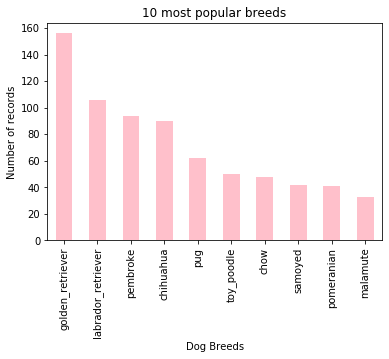

In [818]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df_clean.breed.value_counts()[:10]
data.plot(kind = 'bar', color = 'pink')
plt.xlabel('Dog Breeds')
plt.ylabel('Number of records')
plt.title('10 most popular breeds');

In [826]:
#records of golden retriever
print('% of golden retriever in all the records is:',round(155/1971*100, 2),'%')
print('% of malamute in all the records is:',round(40/1971*100,2),'%')

% of golden retriever in all the records is: 7.86 %
% of malamute in all the records is: 2.03 %


#### Visualization 2: The average rating of 10 most popular breeds 

In [821]:
#calculate the average rating of these breeds
breed_list = ['golden_retriever','labrador_retriever','pembroke','chihuahua','pug','toy_poodle','chow',\
             'samoyed','pomeranian','malamute']
rate_breed = {}

for a in breed_list:
    df = df_clean[df_clean['breed']==a]
    rate = df.rating_numerator_new.sum()/df.shape[0]
    rate_breed[a] = rate
rate_breed

{'golden_retriever': 11.676073926073926,
 'labrador_retriever': 11.19811320754717,
 'pembroke': 11.425531914893616,
 'chihuahua': 10.492929292929293,
 'pug': 10.241935483870968,
 'toy_poodle': 11.0,
 'chow': 11.416666666666666,
 'samoyed': 11.69047619047619,
 'pomeranian': 12.536585365853659,
 'malamute': 10.878787878787879}

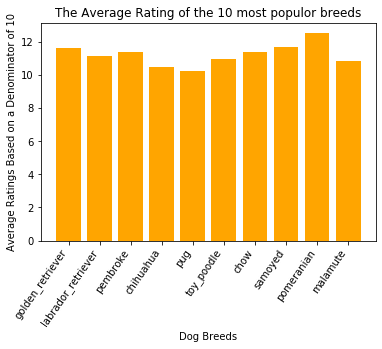

In [827]:
#plot the graph
plt.bar(rate_breed.keys(), rate_breed.values(), color = 'orange')
labels= rate_breed.keys()
xticks_pos = np.arange(len(rate_breed.keys()))
plt.xticks(xticks_pos, labels,  ha='right', rotation=55, fontsize=10)
plt.xlabel('Dog Breeds')
plt.ylabel('Average Ratings Based on a Denominator of 10')
plt.title('The Average Rating of the 10 most populor breeds');

### Conclusion and Insights

1. The top 10 popular breeds are golden retriever, labrador retriever, pembroke,chihuahua, pug, toy poodle, chow, samoyed, pomeranian,malamute.
2. The most popular breed 'golden retriever' has tweets that accounts for more than 7.5% of all the records in this dataset. The 10th popular breed 'malamute' has about 2% of total records.
3. However, the ratings of these breeds are similar and close to 11 out of 10. 'Pomerianian' has the highest rating among all 10 breeds.